In [5]:
import sys
import torch
from pathlib import Path
from torchvision import transforms

from modules import utils, model_builder, data_setup

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

venv_dir = Path(sys.prefix)
project_root = venv_dir.parent
models_dir = project_root/"trained_models"
best_model_path = models_dir/"07_effnetb2_data_20_percent_10_epochs.pth"
best_model = model_builder.create_effnetb2(out_features=3, device=device)
best_model.load_state_dict(torch.load(best_model_path))

# It's hard to deploy really big models
effnetb2_model_size = Path(best_model_path).stat().st_size // (1024*1024)
print(f"EfficientNetB2 feature extractor model size: {effnetb2_model_size} MB")

EfficientNetB2 feature extractor model size: 29 MB


In [6]:
data_20_percent = utils.download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip", destination="pizza_steak_sushi_20_percent")
train_dir = data_20_percent/"train"
test_dir = data_20_percent/"test"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

BATCH_SIZE = 32

train_dataloader_20_percent, test_dataloader_20_percent, class_names = data_setup.create_dataloaders(
    train_dir,
    test_dir,
    transform,
    batch_size=BATCH_SIZE,
)

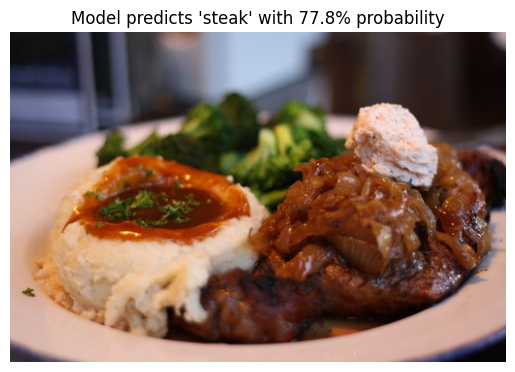

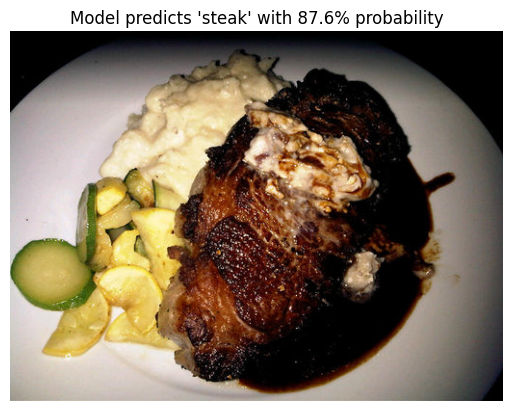

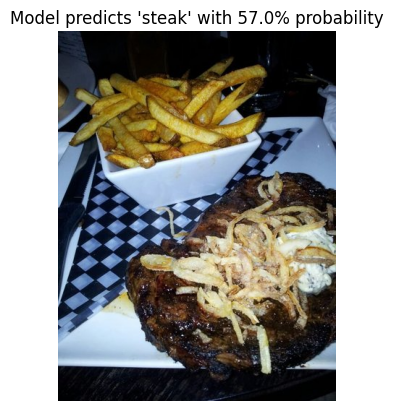

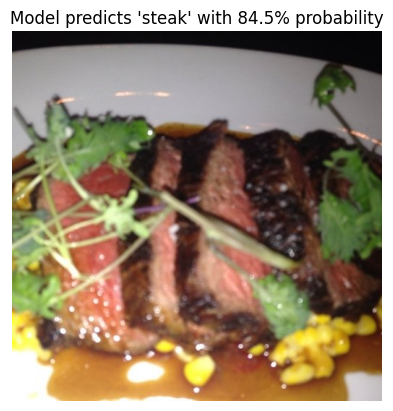

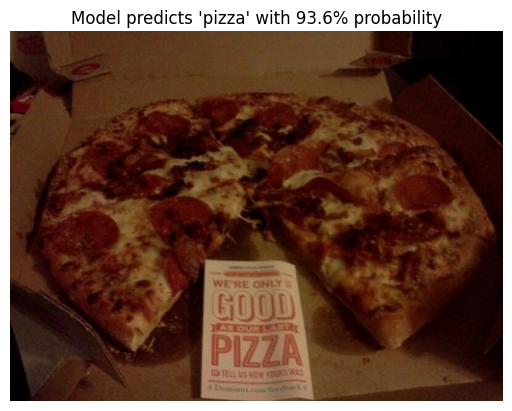

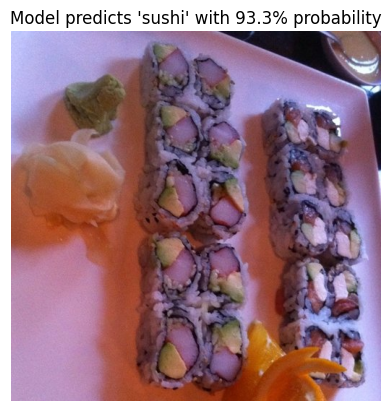

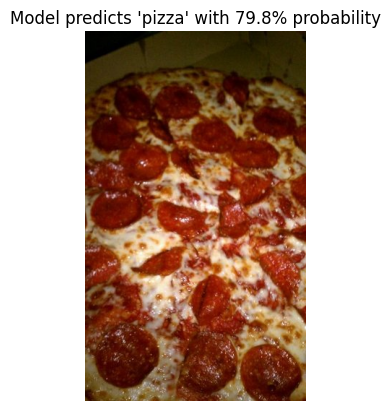

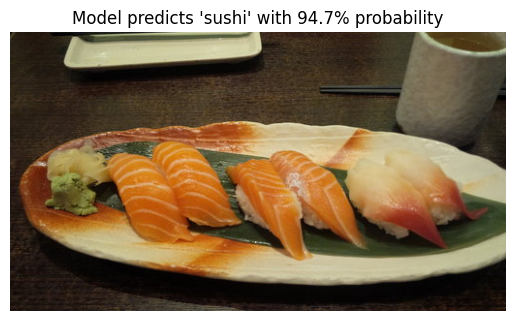

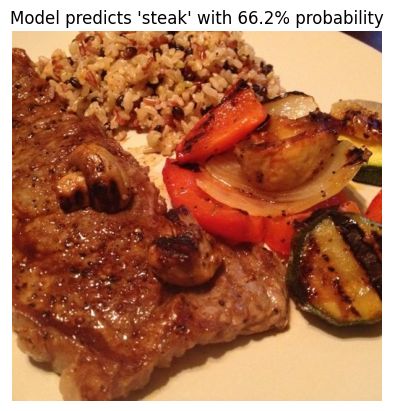

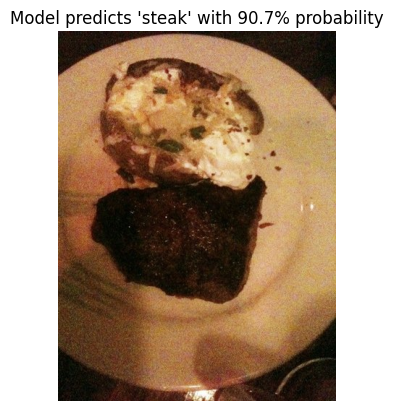

In [7]:
num_images = 10
utils.pred_and_plot_images(
    model=best_model,
    test_dir=test_dir,
    class_names=class_names,
    device=device,
    image_size=(224, 224),
    transform=transform,
    num_images=num_images
)

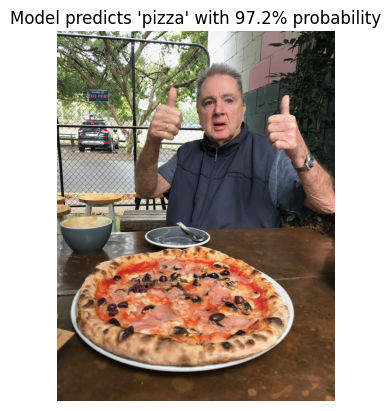

In [10]:
import requests

custom_image_path = project_root / "data" / "04-pizza-dad.jpeg"

if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        f.write(request.content)

utils.pred_and_plot_image(model=best_model,
                    image_path=custom_image_path,
                    class_names=class_names,
                    device=device)